### Метрики и оценка их качества

хорошая статья: https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd


Precision и Recall и комплексная метрика - f-мера

Метрики, при помощи которых мы можем понять насколько хорошо наша модель справляется с задачей классификации.

##### Ошибки 1 и 2 рода:

1 рода - когда отклоняем нулевую гипотезу, хотя имее для этого НЕДОСТАТОЧНО оснований

2 рода - когда НЕ отклоняем нулевую гипотезу, хотя должны были отклонить

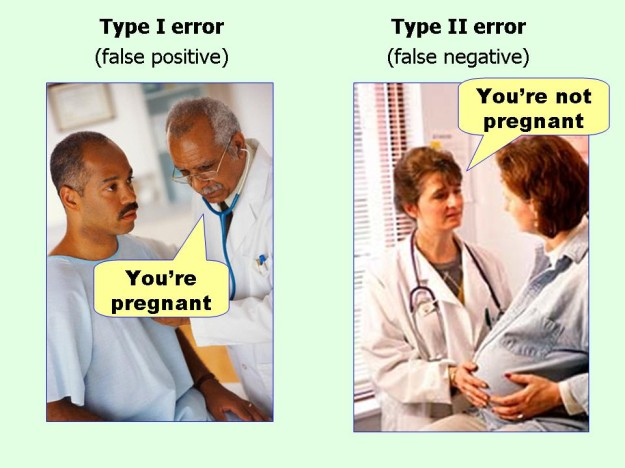

##### Виды ошибок/верных решений:
- False Positive
- False Negative
- True Positive  (справедливо приняли нулевую гипотезу)
- True Negative  (справедливо отклонили нулевую гипотезу)

Формулы для метрик:

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)


#### пример расчетов метрик смотри в репозитории от dgokondra (на основе звездных войн)

Precision и Recall - это метрики, отвечающие на вопрос как хорошо нашему классификатору удаётся справляться с двумя сторонами задачи классификации.

1) Precision - точность.
- Она отвечает на вопрос - "насколько хорошо у нас получается находить положительные классы, не переплачивая за это ложными срабатываниями?".
- не отвечает на вопрос насколько хорошо в целом у нас получается находить положительные примеры.

2) Recall - полнота
- отвечает на вопрос: как хорошо в целом мы находим положительные примеры.
-  "правда ли, что мы нашли всех представителей положительного класса?".

Совместный смысл работы метрик заключается в следующем:
- Precision отвечает насколько низкую цену мы заплатили по считыванию ЛОЖНЫХ срабатываний (доля ПОЛОЖИТЕЛЬНЫХ срабатываний к общему числу ВСЕХ срабатываний) - **чем их меньше, тем метрика выше**

- Recall отвечает насколько точно мы определяем положительные примеры (долю ПОЛОЖИТЕЛЬНЫХ срабатываний к общему числу наблюдений) - **чем меньше наблюдений, которые мы НЕ СЧИТАЛИ, а ДОЛЖНЫ БЫЛИ, тем метрика выше**

#### F- метрика (f-мера)

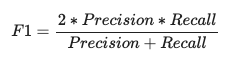

**Вопрос: так а что же более важное?**

По отдельности эти две метрики абсолютно изолированы друг от друга и на самом деле ответ на вопрос зависит от того какую задачу вы решаете.

Вернемся к космолетам.

Пусть у нас есть всего 2 космолёта, и мы не можем себе позволить отправить их на ложное срабатывание. Тогда нам более важна метрика Precision. Recall нам не важен.

Обратная ситуация: мы играем за империю, и у нас безграничные ресурсы, а у противника всего 2 корабля. Тогда нам не важно ложное срабатывание, нам нужо любой ценой найти 2 корабля вражеского сопротивления, т.е. мы оптимизируем Recall.

**А если мы заранее не знаем какая метрика нам более важна?**

Можно оптимизировать обе эти метрики одновременно. В этом случае используется комбинированная метрика ***f-мера***, и она по смыслу является гармоническим средним между этими двумя метриками.

##### Важный тезис: когда мы говорим про внедрение решений, основанных на данных, нужно чтобы баланс между этими метриками оставался в нужном, правильном для нас состоянии.

***что это означает?***

а то, что при проверке точности модели задача разбивается на две части:
1) True science - это поиск максимально точной модели с точки зрения ML
2) Business task - определение максимально верного решения модели с точки зрения влияния на показатели БИЗНЕСА (не УХУДШАЕТ ли их наша предсказательная модель)

**вывод: нужен симбиоз решения этих двух подзадач**



### Задача на лайки, дизлайки в Тиндере

вспомогательная статья про волка, пастуха и овец: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative?hl=ru

некий Анатолий зарегистрировался в приложении знакомств, некий алгоритм на основе машинного обучения порекомендовал Анатолию 30 фотографий из 100. Анатолий лайкнул 15 фотографий из 30 предложенных, в дальнейшем выяснилось, что Анатолий мог бы лайкнуть еще 30 фотографий из 70 непредложенных.

Будем считать, что  лайк Анатолия является положительным исходом, а отсутствие лайка - отрицательным. Соответственно предсказанный лайк, совпавший с реальным - True positive, предсказанный лайк, не завершившийся реальным лайком - False positive и т. д. Давайте оценим работу алгоритма с точки зрения метрик качества модели.

Таблица называется "Матрица путанницы" или confusion matrix

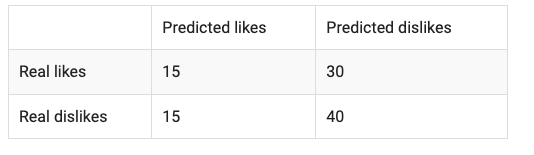

Из таблицы: 
- общее число предсказанных лайков 15+15 из 100 , то есть 30
- общее число предсказанных дизлайков 30+40 из 100, то есть 70

Алгоритм - это пастух, лайки Анатолия - волки

1) Пастух сказал что волки есть в 30 случаях из 100

На самом деле волки были в 15 случаях из этих 30(те самые лайки Анатолия). Это как раз и есть "верное срабатывание" или True Positive.

2) Соответственно ситуация, когда пастух сказал что волки есть, а их не было называется False Positive в данном случае это тоже 15, т.к. 15 раз мы сказали что волки есть(фото понравится), но ошиблись - волков нет(фото НЕ понравилось). Иными словами "ложное срабатывание".

3) Из 70 оставшихся случаев(фото) - 30 раз волки были (лайк на фото), но пастух сказал что волков нет (все предсказанные лайки кончились) - это False Negative, то есть "пропуск события"
4) далее осталось 40 случаев(фото), когда пастух сказал что волков нет (лайков не будет) и их действительно не было. Это True Negative получается что-то типа "верное бездействие"

In [1]:
# рассчитаем Precision and Recall

pres = 15/(15+15)

rec = 15/(15+30)

f1 = 2* pres* rec / (pres+rec)

print(pres,rec,f1, sep='\n')

0.5
0.3333333333333333
0.4


Еще раз напоминалка для себя.

1) хотим увеличить точность (уменьшить количество ложных срабатываний) - работаем над повышением значения метрики Precision
 (ведь чем меньше ложных положительных срабатываний, тем больше этот показатель стремится к единице)

 например, поиск дорогих металлов на астероидах - нет ресурсов исследовать их все! нужно, чтобы алгоритм точно определил на каких астероидах есть ценности, мне не нужны кучи ложных положительных сработок

 2) хотим увеличить объем, количество правильных результатов - работаем со значением метрики Recall (повышаем ее до 1)
 - это в случае, когда ресурсы не ограничены, и мы можем тратить их даже на ложные положительные сработки алгоритма, лишь бы ПОЛНОТА результатов была как можно выше

 например, денег много, я хочу найти ВСЕ астероиды, на которых есть металл. Ну так я и прочещу весь космос и отберу только те астероиды, на которых есть ценности

#### Задача: посчитать метрики для датасэта, содержащего инф о песнях и исполнителях

 В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, потюньте немного модель.

In [28]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import precision_score                 # импортировать модуль расчета метрики Precision из библиотеки
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import numpy as np

In [29]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

In [3]:
data = pd.read_csv('songs.csv')
data

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [16]:
X = data.drop(['song', 'artist', 'lyrics'], axis =1)
y= data.artist

In [20]:
X= pd.get_dummies(X, columns = ['genre'])
X

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
0,2007,1300,24,5,0,11,1,0,0
1,2006,1566,0,0,0,0,0,1,0
2,2006,996,1,0,1,0,0,1,0
3,2015,2868,5,0,0,0,0,1,0
4,2014,3351,22,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...
355,2006,972,2,0,0,1,0,0,1
356,1995,1283,33,0,0,3,0,0,1
357,1981,810,1,0,0,0,0,0,1
358,2006,1996,34,0,0,5,1,0,0


In [21]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score

In [30]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()         # добавили новый параметр - набор средних значений кросс-валидации модели 
                                                                                        #для каждой глубины дерева (от 1 до 99)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.726141,0.638655,0.72619
0,2,1.000000,1.000000,1.00000
0,3,1.000000,1.000000,1.00000
0,4,1.000000,1.000000,1.00000
0,5,1.000000,1.000000,1.00000
...,...,...,...,...
0,95,1.000000,1.000000,1.00000
0,96,1.000000,1.000000,1.00000
0,97,1.000000,1.000000,1.00000
0,98,1.000000,1.000000,1.00000


In [36]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

best_clf.fit(X_train,y_train)

best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=2)

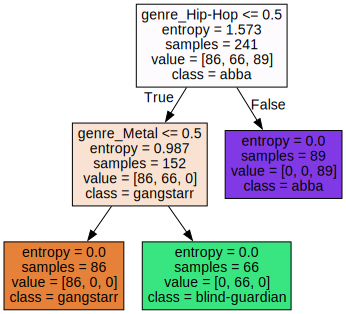

In [37]:
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                    feature_names=list(X_train),
                                    class_names=['gangstarr', 'blind-guardian', 'abba'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [73]:
predictions = best_clf.predict(X_test)

res_df = pd.DataFrame({'predicted_artist' : predictions})

res_df

,predicted_artist
0,abba
1,gangstarr
2,abba
3,abba
4,abba
...,...
114,gangstarr
115,blind-guardian
116,blind-guardian
117,gangstarr


In [40]:
predicted_test_data= X_test.copy()

predicted_test_data['predicted_artist'] = predictions

predicted_test_data


,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop,predicted_artist
224,2006,1549,24,0,0,0,0,0,1,abba
42,2006,3200,41,0,0,0,1,0,0,gangstarr
285,2006,843,16,0,0,1,0,0,1,abba
302,1995,877,10,5,0,8,0,0,1,abba
56,2010,1238,12,0,0,0,0,0,1,abba
...,...,...,...,...,...,...,...,...,...,...
79,2006,2966,56,0,0,1,1,0,0,gangstarr
163,2006,1462,0,0,0,0,0,1,0,blind-guardian
18,2006,2414,1,0,0,0,0,1,0,blind-guardian
301,2007,2836,39,0,0,7,1,0,0,gangstarr


переведем серию во фрейм

In [70]:
fact_art = y_test.to_frame()


Хороший способ перенумеровать индексы:
- сбросить их
- удалить столбец индексы (там будут храниться старые индексы)

In [66]:
fact_art.reset_index().drop(['index'], axis=1)

,artist
0,abba
1,gangstarr
2,abba
3,abba
4,abba
...,...
114,gangstarr
115,blind-guardian
116,blind-guardian
117,gangstarr


In [55]:
res_df

,predicted_artist
0,abba
1,gangstarr
2,abba
3,abba
4,abba
...,...
114,gangstarr
115,blind-guardian
116,blind-guardian
117,gangstarr


Объединим датафреймы:
- один - это тестовые значения исполнителя (как собственно и было заложено в исходном файле)
- второй - это предсказанные значения испольнителей на основании тестовых данных (когда классификатор НЕ ВИДЕЛ исполнителей)

In [69]:
compare_df = res_df.join(fact_art.reset_index().drop(['index'], axis=1))

compare_df['is_alike'] = (compare_df.predicted_artist == compare_df.artist)

compare_df

,predicted_artist,artist,is_alike
0,abba,abba,True
1,gangstarr,gangstarr,True
2,abba,abba,True
3,abba,abba,True
4,abba,abba,True
...,...,...,...
114,gangstarr,gangstarr,True
115,blind-guardian,blind-guardian,True
116,blind-guardian,blind-guardian,True
117,gangstarr,gangstarr,True


Убедимся, что столбец is_alike содержит только True значения 

In [72]:
compare_df.is_alike.unique()

array([ True])

Считаем точность модели предсказаний (метрика Precision)

In [75]:
precision_score(y_test, predictions, average='micro')

1.0

она получилась 100% ))) 

это супер, конечно, но данные слишком очевидные для отбора!

удалим столбцы жанр и год, чтобы классификатору было сложнее!

In [78]:
X = data.drop(['song', 'artist', 'lyrics', 'year', 'genre'], axis =1)
y= data.artist

In [81]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()         # добавили новый параметр - набор средних значений кросс-валидации модели 
                                                                                        #для каждой глубины дерева (от 1 до 99)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.647303,0.563025,0.647194
0,2,0.705394,0.689076,0.688520
0,3,0.771784,0.739496,0.705272
0,4,0.796680,0.739496,0.692857
0,5,0.800830,0.722689,0.688946
...,...,...,...,...
0,95,0.995851,0.714286,0.705612
0,96,0.995851,0.697479,0.688946
0,97,0.995851,0.689076,0.701190
0,98,0.995851,0.689076,0.688776


In [83]:
scores_data.cross_val_score.max()

0.7262755102040817

In [85]:
scores_data.loc[scores_data.cross_val_score==0.7262755102040817]

,max_depth,train_score,test_score,cross_val_score
0,89,0.995851,0.697479,0.726276


получилась слишком большая глубина дерева, поэтому глядя на табличку вполне устроит глубина дерева = 3

In [86]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

best_clf.fit(X_train,y_train)

best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

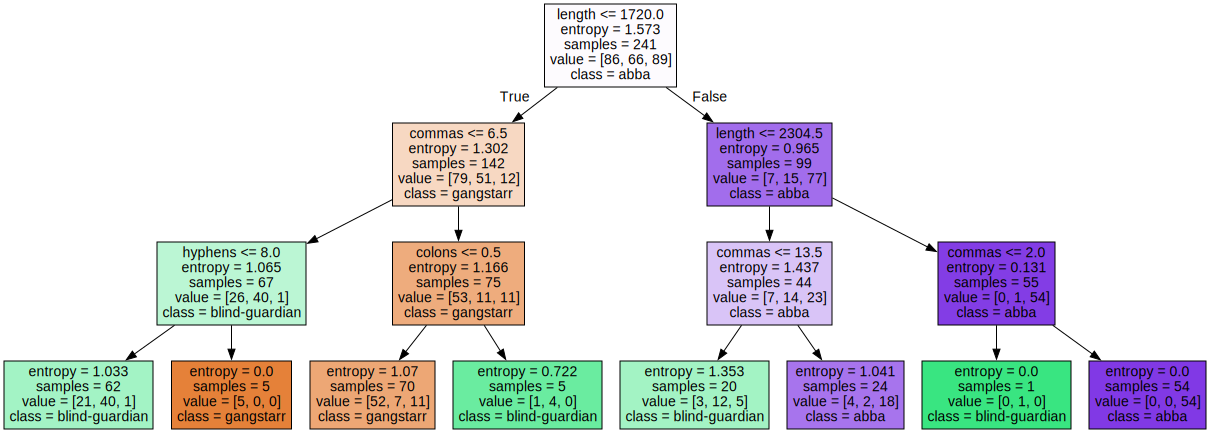

In [87]:
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                    feature_names=list(X_train),
                                    class_names=['gangstarr', 'blind-guardian', 'abba'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [88]:
predictions = best_clf.predict(X_test)

res_df = pd.DataFrame({'predicted_artist' : predictions})

res_df

,predicted_artist
0,abba
1,gangstarr
2,abba
3,abba
4,abba
...,...
114,gangstarr
115,blind-guardian
116,blind-guardian
117,gangstarr


снова считаем точность (Precision):

In [89]:
precision_score(y_test, predictions, average='micro')

0.7394957983193278

Хм, этого недостаточно, пороговое значение составляет 0.78 (по условиям задачи)

значит нужно подкрутить модель:

посмотрим какие значения принимают наши показатели при глубине от 1 до 18:

In [91]:
scores_data.head(20)

,max_depth,train_score,test_score,cross_val_score
0,1,0.647303,0.563025,0.647194
0,2,0.705394,0.689076,0.688520
0,3,0.771784,0.739496,0.705272
0,4,0.796680,0.739496,0.692857
0,5,0.800830,0.722689,0.688946
0,6,0.817427,0.638655,0.680272
0,7,0.854772,0.714286,0.688605
0,8,0.892116,0.714286,0.705272
0,9,0.921162,0.647059,0.705442
0,10,0.941909,0.722689,0.705442


наиболее подходящим кажется глубина дерева = 3

но не забывай - желательно выполнение ТРЕХ условий:
1) соотношение между scores for train_data and test_data должно стремиться к единице
2) score , полученный на кросс-валидации должен быть как можно больше
3) глубину дерева нужно брать как можно меньше исходя из перечисленных условий

In [129]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)       # увеличим глубину дерева

best_clf.fit(X_train,y_train)

best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [130]:
predictions = best_clf.predict(X_test)

res_df = pd.DataFrame({'predicted_artist' : predictions})

res_df

,predicted_artist
0,abba
1,gangstarr
2,abba
3,abba
4,abba
...,...
114,gangstarr
115,blind-guardian
116,blind-guardian
117,gangstarr


In [131]:
precision_score(y_test, predictions, average='micro')

0.7394957983193278

Кстати, поискать наилучшую глубину для модели, чтобы увидеть максимальную точность предсказаний можно так:

In [134]:
prec_val_list = []
for max_depth in max_depth_values:
    find_best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)       # увеличим глубину дерева
    find_best_clf.fit(X_train,y_train)
    predictions = find_best_clf.predict(X_test)
    precision_val = precision_score(y_test, predictions, average='micro')
    prec_val_list.append(precision_val)

best_depth = prec_val_list.index(max(prec_val_list))+1      # ищем индекс максимального значения в списке Precision-значений
                                                            # он будет соответствовать наилучшей глубине за вычетом 1
                                                            # потому что в цикле перебор глубин ведется с 1

print(f'Лучшая глубина для итоговой модели = {best_depth}')

Лучшая глубина для итоговой модели = 3
